## Text analysis of Lyrics and classification

In [2]:
import pandas as pd

In [3]:
music_df  = pd.read_excel("topsongs.xlsx")
music_df.head()

,title,artist,lyrics,Category
0,Even If,MercyMe,"Sometimes you lose some\r\nAnd right now, righ...",Inspiring
1,Broken Things,Matthew West,I stopped at the gate\r\nThinking I don't dese...,Inspiring
2,Old Church Choir,Zach Williams,"Like a wildfire in my heart\r\nSunday morning,...",Inspiring
3,O Come to the Altar,Elevation Worship,Overwhelmed by the weight of your sin\r\nJesus...,Inspiring
4,Different,Micah Tyler,"I don't wanna see anymore, give me a vision\r\...",Inspiring


In [4]:
music_df.describe()

,title,artist,lyrics,Category
count,113,113,113,113
unique,109,76,106,3
top,Kiss Me,Elevation Worship,"Nightly, beside the green, green grass\r\nSwin...",Inspiring
freq,3,5,3,67


## Preprocessing

#### Reading the dataset

In [10]:
df_train = pd.read_excel('train_music.xlsx')
df_test = pd.read_excel('test_music.xlsx')

X_train = df_train['lyrics'].values 
y_train = df_train['category'].values

X_test = df_test['lyrics'].values 
y_test = df_test['category'].values

df_train.head()

,title,artist,lyrics,category
0,Even If,MercyMe,"Sometimes you lose some\r\nAnd right now, righ...",Inspiring
1,Broken Things,Matthew West,I stopped at the gate\r\nThinking I don't dese...,Inspiring
2,Old Church Choir,Zach Williams,"Like a wildfire in my heart\r\nSunday morning,...",Inspiring
3,O Come to the Altar,Elevation Worship,Overwhelmed by the weight of your sin\r\nJesus...,Inspiring
4,Different,Micah Tyler,"I don't wanna see anymore, give me a vision\r\...",Inspiring


## Label Encoder

In [11]:
from sklearn import preprocessing
import numpy as np

le = preprocessing.LabelEncoder()


y_train_le = le.fit(y_train)
y_test_le = le.fit(y_test)

print(list(y_train_le.classes_))
print(list(y_test_le.classes_))

y_train = le.transform(y_train)
y_test  = le.transform(y_test)

print(y_train[:5])
print(y_test[:-5])


['Inspiring', 'inspiring_non_christian_music', 'non_inspiring']
['Inspiring', 'inspiring_non_christian_music', 'non_inspiring']
[0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2]


### Stop word list

In [14]:
with open("C://Users//datta//Movie_lens//stopwords_eng.txt") as sw:
    stopwords = sw.read().split()
stopwords[:10]

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after']

### Feature extraction: Word counts and Vectorizers

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()

import re

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: text.split(),
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_1 = vec_porter.get_feature_names()
print(vocab_1[-10:])

Vocabular size: 1555 words
['yaks', 'yea', 'yeah', 'years', 'yesterday', 'yo', 'young', 'younger', 'youth', 'zeppelin']


In [17]:
porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [porter.stem(word) for word in text.split()],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_2 = vec_porter.get_feature_names()
print(vocab_2[-10:])

Vocabular size: 1325 words
['ye', 'yea', 'yeah', 'year', 'yesterday', 'yo', 'young', 'younger', 'youth', 'zeppelin']


### Positive and negative words list

In [18]:
with open('./negative-words.txt', 'r') as w:
    negative_words = w.read().split()
print('number of negative words: %s' % len(negative_words))
negative_words[-5:]

number of negative words: 4783


['zaps', 'zealot', 'zealous', 'zealously', 'zombie']

In [19]:
with open('./positive-words.txt', 'r') as w:
    positive_words = w.read().split()
print('number of positive words: %s' % len(positive_words))
positive_words[-5:]

number of positive words: 2006


['youthful', 'zeal', 'zenith', 'zest', 'zippy']

In [20]:
negative_words = set(negative_words)
positive_words = set(positive_words)
semantic_words = negative_words.union(positive_words)

In [21]:
# With whitelist 

# With Porter Stemming
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import re

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [word for word in text.split() if word in semantic_words],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_3 = vec_porter.get_feature_names()
print(vocab_3[-10:])

Vocabular size: 313 words
['wonderful', 'works', 'worn', 'worry', 'worse', 'worth', 'worthy', 'wow', 'wretch', 'wrong']


In [23]:
# With whitelist and Porter Stemming

# With Porter Stemming
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import re

porter = PorterStemmer()

vec_porter = CountVectorizer(analyzer='word',
                      decode_error='replace',
                      tokenizer=lambda text: [porter.stem(word) for word in text.split() if word in semantic_words],
                      preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()), 
                      stop_words=stopwords,) 


vec_porter.fit(X_train)

print('Vocabular size: %s words' % len(vec_porter.vocabulary_))

vocab_4 = vec_porter.get_feature_names()
print(vocab_4[-10:])

Vocabular size: 272 words
['wise', 'won', 'worn', 'worri', 'wors', 'worth', 'worthi', 'wow', 'wretch', 'wrong']


### Summary vocabulary sizes

In [24]:
print('All words: %s ' % len(vocab_1))
print('Porter: %s ' % len(vocab_2))
print('Whitelist: %s ' % len(vocab_3))
print('Porter + Whitelist: %s ' % len(vocab_4))

All words: 1555 
Porter: 1325 
Whitelist: 313 
Porter + Whitelist: 272 


## Model Selection

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.grid_search import GridSearchCV
from nltk.stem import PorterStemmer
import re
import pickle
from sklearn import metrics

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [27]:
pickle.dump(semantic_words, open('./semantic_words.p', 'wb'))

In [40]:
porter = PorterStemmer()

semantic_words = pickle.load(open('./semantic_words.p', 'rb'))

with open('./stopwords_eng.txt') as sw:
    stop_words = sw.read().split()
    
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=3, average='macro')

#### Grid Search 

In [41]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer

porter = PorterStemmer()
snowball = EnglishStemmer()

# raw words
tokenizer = lambda text: text.split()

# words after Porter stemming 
tokenizer_porter = lambda text: [porter.stem(word) for word in text.split()]

# Words after Snowball stemming
tokenizer_snowball = lambda text: [snowball.stem(word) for word in text.split()]

# Only words that are in a list of 'positive' or 'negative' words ('whitelist')
# http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon
tokenizer_whitelist = lambda text: [word for word in text.split() if word in semantic_words]

# Porter-stemmed words in whitelist
tokenizer_porter_wl = lambda text: [porter.stem(word) for word in text.split() if word in semantic_words]

# Snowball-stemmed words in whitelist
tokenizer_snowball_wl = lambda text: [snowball.stem(word) for word in text.split() if word in semantic_words]

In [72]:
pipeline_1 = Pipeline([
    ('vect', CountVectorizer(binary=True,
                             stop_words=stop_words,
                             ngram_range=(1,1),
                             preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                             )),
    ('clf', MultinomialNB(fit_prior=False, 
                          alpha=1.0))
])

parameters_1 = dict(
    vect__tokenizer=[tokenizer, tokenizer_porter, tokenizer_whitelist, tokenizer_porter_wl],
)

grid_search_1 = GridSearchCV(pipeline_1, 
                           parameters_1, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=3
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_1.steps])
grid_search_1.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_1.best_score_)
print("Best parameters set:")
best_parameters_1 = grid_search_1.best_estimator_.get_params()
for param_name in sorted(parameters_1.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1023: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1023: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1023: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being 

Best score: 0.622
Best parameters set:
	vect__tokenizer: <function <lambda> at 0x000001D10BE5CA60>


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1023: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.4s finished


In [47]:
pipeline_2 = Pipeline([
    ('vect', TfidfVectorizer(binary=False,
                             stop_words=stop_words,
                             ngram_range=(1,1),
                             preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                             )),
    ('clf', MultinomialNB(fit_prior=False, 
                          alpha=1.0))
])

parameters_2 = dict(
    vect__tokenizer=[tokenizer, tokenizer_porter, tokenizer_whitelist, tokenizer_porter_wl],
)

grid_search_2 = GridSearchCV(pipeline_2, 
                           parameters_2, 
                           n_jobs=1, 
                           verbose=1,
                           scoring=f1_scorer,
                           cv=None
                )


print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline_2.steps])
grid_search_2.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search_2.best_score_)
print("Best parameters set:")
best_parameters_2 = grid_search_2.best_estimator_.get_params()
for param_name in sorted(parameters_2.keys()):
    print("\t%s: %r" % (param_name, best_parameters_1[param_name]))

Performing grid search...
pipeline: ['vect', 'clf']
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1023: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1023: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1023: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use

Best score: 0.615
Best parameters set:
	vect__tokenizer: <function <lambda> at 0x000001D10BE5CA60>


C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1023: UserWarning: Note that pos_label (set to 3) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.3s finished


In [48]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import StratifiedKFold
from scipy import interp

sns.set()
sns.set_style("whitegrid")

vect_1 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_2 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_3 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)  

vect_4 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)  

vect_5 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_6 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)

vect_7 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_8 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_9 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)

vect_10 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)    

vect_11 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_12 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)

pipelines = []
vectorizers = [vect_1, vect_2, vect_3, vect_4, vect_5, vect_6, vect_7, vect_8, vect_9, vect_10, vect_11, vect_12]
for v in vectorizers:
    pipelines.append(Pipeline([('vect', v),
                               ('clf', MultinomialNB(fit_prior=False, alpha=1.0))]))
    
for v in vectorizers[:6]:
    pipelines.append(Pipeline([('vect', v),
                               ('clf', BernoulliNB(fit_prior=False, alpha=1.0))]))

In [76]:
grid_search_1.grid_scores_

[mean: 0.53975, std: 0.05550, params: {'vect__tokenizer': <function <lambda> at 0x000001D10BE5C730>},
 mean: 0.46681, std: 0.04471, params: {'vect__tokenizer': <function <lambda> at 0x000001D10BE5CEA0>},
 mean: 0.62175, std: 0.08150, params: {'vect__tokenizer': <function <lambda> at 0x000001D10BE5CA60>},
 mean: 0.59565, std: 0.07379, params: {'vect__tokenizer': <function <lambda> at 0x000001D10BE5CAE8>}]

In [91]:
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
import itertools
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics

In [103]:
music_df['merge'] = music_df['title'] + " " + music_df['artist'] + " " + music_df['lyrics']  

In [104]:
music_df['merge'].head()

0    Even If MercyMe Sometimes you lose some\r\nAnd...
1    Broken Things Matthew West I stopped at the ga...
2    Old Church Choir Zach Williams Like a wildfire...
3    O Come to the Altar Elevation Worship Overwhel...
4    Different Micah Tyler I don't wanna see anymor...
Name: merge, dtype: object

In [105]:
transformer  = TfidfTransformer(smooth_idf=False)
feature_cols = ['title','artist','lyrics']
category = music_df['Category'].unique()
category_dict = {value:index for index, value in enumerate(category)}
corpus = music_df['merge']
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus).toarray()
print(X.shape)
vectorizer.get_feature_names()
y = music_df['Category'].map(category_dict)
category_dict

(113, 2373)


{'Inspiring': 0, 'inspiring_non_christian_music': 1, 'non_inspiring': 2}

In [106]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [107]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.3)

In [108]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [109]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [111]:
y_pred_class = mnb.predict(X_test)
print(y_pred_class)

[0 0 0 2 1 1 2 0 0 0 2 0 0 2 0 0 2 0 0 0 1 0 0 0 0 1 2 1 0]


In [115]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.620689655172


NUll Accuracy 

In [116]:
# Examine the class distribution of the testing set using a Pandas Series Methods
y_test.value_counts()

0    17
2     7
1     5
Name: Category, dtype: int64

In [117]:
y_test.mean()

0.6551724137931034

In [118]:
1  - y_test.mean()

0.3448275862068966

Null accuracy single line of code

In [119]:
y_test.value_counts().head(1)/ len(y_test)

0    0.586207
Name: Category, dtype: float64

Compairing the true and predicted response values

In [121]:
#print the first 25 true and predicted responses
print ('true', y_test.values[0:10])
print('Pred', y_pred_class[0:10])

true [2 0 0 0 2 0 0 1 0 0]
Pred [0 0 0 2 1 1 2 0 0 0]


In [112]:
y_test.value_counts().head(1) / len(y_test)

0    0.586207
Name: Category, dtype: float64

## Validation

#### Confusion Matrix

In [122]:
from sklearn.metrics import confusion_matrix

In [123]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[13  2  2]
 [ 2  2  1]
 [ 3  1  3]]


In [125]:
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[13,  2,  2],
       [ 2,  2,  1],
       [ 3,  1,  3]])

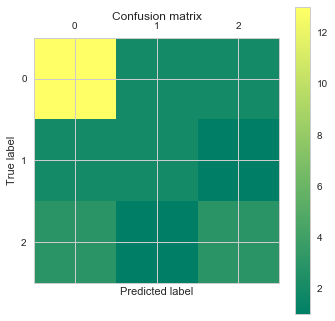

In [126]:
plt.matshow(cm)
plt.title('Confusion matrix')
c = plt.summer()
plt.colorbar(c)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()